# Logistic Regression

## Loan Prediction

### About Dataset

    Predict Loan Eligibility for Dream Housing Finance company Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

    Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

## Exploratory Data Analysis: Unveiling Patterns and Insights

    1. Introduction
        Exploratory Data Analysis (EDA) is a crucial phase in the data analysis pipeline, serving as the foundation for making informed decisions and deriving meaningful insights from raw data. This document
        aims to provide a comprehensive understanding of the EDA process, its importance, and the key techniques involved.

    2. Objectives of Exploratory Data Analysis
        1. Understand Data Characteristics:
            Gain insights into the distribution, central tendency, and variability of the data.
            Identify the presence of missing values, outliers, and anomalies.

        2. Explore Relationships:
            Examine correlations and dependencies between different variables.
            Uncover potential patterns and trends within the dataset.
        
        3. Visualize Data Distributions:
            Utilize graphical representations to visualize the distribution of data.
            Choose appropriate plots such as histograms, box plots, and scatter plots.
            
        4. Identify Patterns and Anomalies:
            Uncover hidden patterns that may not be apparent in raw data.
            Detect outliers and anomalies that could impact analysis outcomes.
            
            
    3. Techniques and Tools
        1. Descriptive Statistics:
            Calculate measures such as mean, median, and standard deviation.
            Utilize summary statistics to provide an overview of the dataset.
            Data Visualization:

            Employ graphical representations like histograms, box plots, and scatter plots.
            Create visualizations to illustrate trends, patterns, and relationships.
            Correlation Analysis:

            Use correlation matrices to quantify the relationships between variables.
            Identify strong positive/negative correlations and potential multicollinearity.
            Outlier Detection:

            Apply statistical methods or visual inspection to identify outliers.
            Assess the impact of outliers on the analysis and consider appropriate handling.

    4. Steps in Exploratory Data Analysis
        1. Data Collection:
            Gather the raw dataset from reliable sources.

        2. Data Cleaning:
            Handle missing values, duplicate entries, and inconsistencies.
            Ensure data is in a suitable format for analysis.

        3. Descriptive Statistics:
            Compute basic statistics to describe the central tendency and dispersion.

        4. Visualization:
            Generate visualizations to explore data distributions and relationships.

        5. Correlation Analysis:
            Investigate correlations between variables.

        6. Outlier Detection:
            Identify and analyze outliers to understand their impact.

    5. Case Study: Applying EDA to Real-World Data
        Provide a practical example where EDA is applied to a specific dataset, showcasing the step-by-step process and the insights gained.

    6. Conclusion
        Summarize the key findings from the EDA process and emphasize its importance in guiding subsequent data analysis and decision-making.

    7. References
        Include references to any tools, libraries, or methodologies used in the EDA process.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Documentation
import handcalcs.render

# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

from matplotlib import cm # color map
import seaborn as sns
import plotly.express as px

# Importing detect_outliers function from datasist library
from datasist.structdata import detect_outliers

from sympy import Sum, symbols, Indexed, lambdify, diff
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

In [2]:
# Path
data_path = './Data/'

### Load the dataset

In [3]:
train_data = pd.read_csv(data_path+"train.csv",  low_memory=False).reset_index(drop=True)
test_data = pd.read_csv(data_path+"test.csv",  low_memory=False).reset_index(drop=True)

print("Shape of the train data: ", train_data.shape)
print("Shape of the test data: ", test_data.shape)

Shape of the train data:  (614, 13)
Shape of the test data:  (367, 12)


In [4]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
columns = train_data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
raw_data = pd.concat([train_data,test_data],ignore_index=True)
raw_data.shape

(981, 13)

### Finding for missing values

In [11]:
raw_data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
raw_data["LoanAmount"].fillna(raw_data["LoanAmount"].mean(),inplace=True)

In [13]:
raw_data["CoapplicantIncome"].fillna(raw_data["CoapplicantIncome"].mean(),inplace=True)

In [14]:
raw_data["ApplicantIncome"].fillna(raw_data["ApplicantIncome"].mean(),inplace=True)

In [15]:
raw_data["Loan_Amount_Term"].fillna(raw_data["Loan_Amount_Term"].mean(),inplace=True)

In [16]:
raw_data["Credit_History"].fillna(raw_data["Credit_History"].mean(),inplace=True)

In [17]:
# Add Credit history Manually in cat cols because it has data in the form of 0 and 1
cat_cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History']

In [18]:
# Imputing object data with mode
for i in cat_cols:
    raw_data[i].fillna(raw_data[i].mode()[0],inplace=True)

In [19]:
raw_data.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
raw_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.00000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.00000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.00000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.00000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.00000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.00000,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.00000,360.0,1.00000,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.00000,360.0,0.83592,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.00000,360.0,1.00000,Rural,Y


In [21]:
raw_data.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [22]:
for column in raw_data.columns:
    if column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
        print("-------------------------------------------------",column," - ",len(raw_data[column].unique()),"---------------------------------------------------")
        print(raw_data[column].unique())
        print("--------------------------------------------------------------------------------------------------------------")
        

------------------------------------------------- Gender  -  2 ---------------------------------------------------
['Male' 'Female']
--------------------------------------------------------------------------------------------------------------
------------------------------------------------- Married  -  2 ---------------------------------------------------
['No' 'Yes']
--------------------------------------------------------------------------------------------------------------
------------------------------------------------- Education  -  2 ---------------------------------------------------
['Graduate' 'Not Graduate']
--------------------------------------------------------------------------------------------------------------
------------------------------------------------- Self_Employed  -  2 ---------------------------------------------------
['No' 'Yes']
--------------------------------------------------------------------------------------------------------------
-------------

### Data Exploration

In [23]:
# Setting seaborn visualization parameters
sns.set(rc={"figure.figsize" : [12 ,4]}, font_scale=1.2)
sns.set(rc={"axes.facecolor":"#F2F3F4","figure.facecolor":"#F2F3F4"})
palette = ["#F08080", "#FA8072", "#E9967A", "#FFA07A", "#CD5C5C", "#AF601A", "#CA6F1E"]

sns.set_palette(palette)
color_map = colors.ListedColormap(palette)

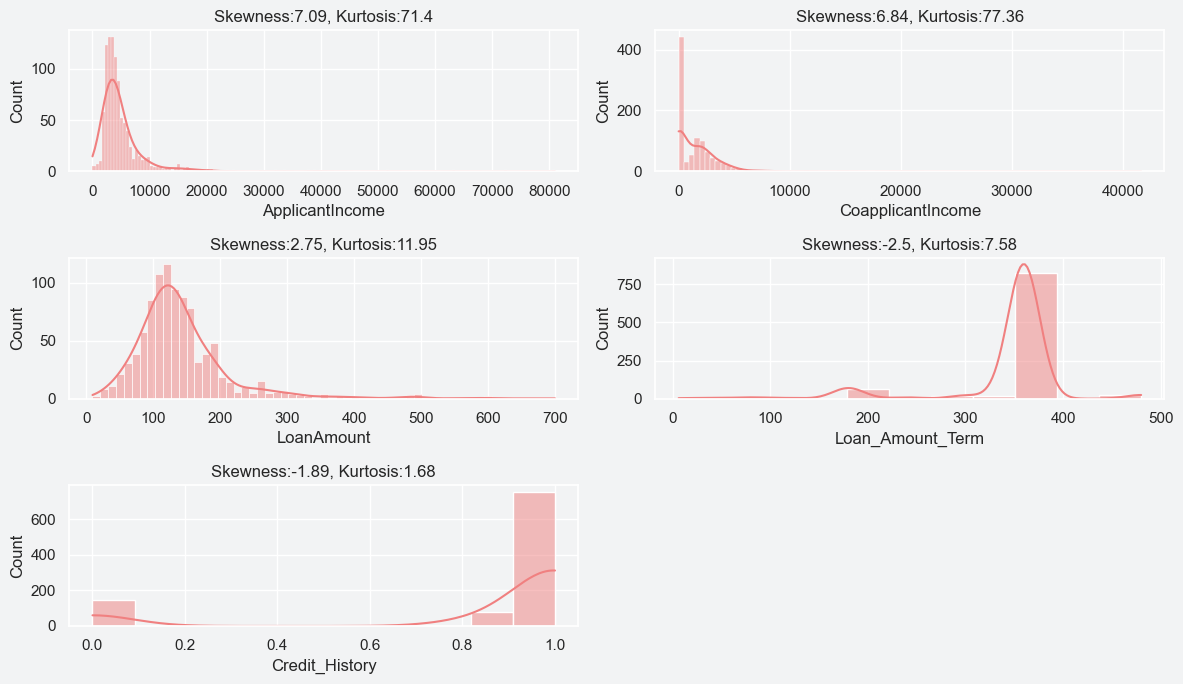

In [24]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(12,7))
t = 1
for i in raw_data.select_dtypes(include=np.number).columns:
    plt.subplot(3,2,t)
    sns.histplot(raw_data[i], kde=True)
    plt.title(f"Skewness:{raw_data[i].skew().round(2)}, Kurtosis:{raw_data[i].kurt().round(2)}")
    t+=1
plt.tight_layout()
plt.show()


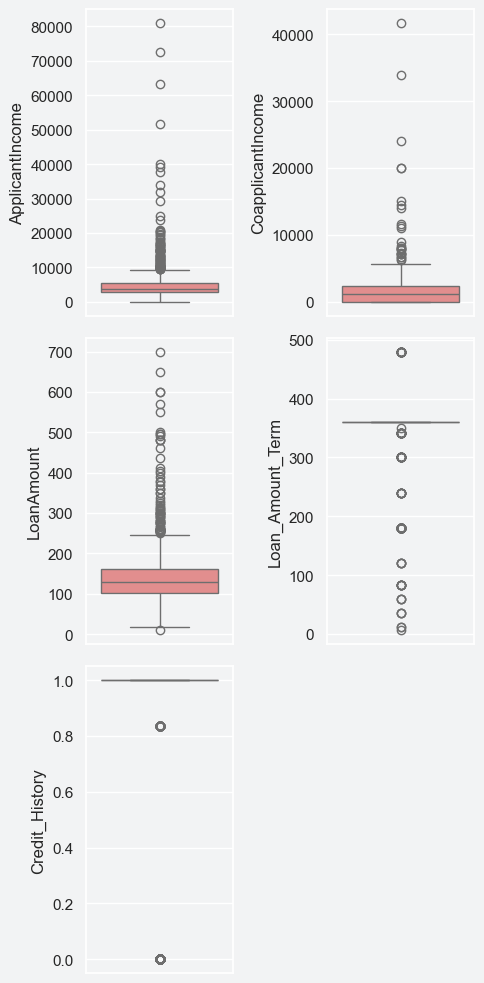

In [25]:
# Univariate Analysis For Numerical Features:
plt.figure(figsize=(5,10))
t = 1
for i in raw_data.select_dtypes(include=np.number).columns:
    plt.subplot(3,2,t)
    sns.boxplot(raw_data[i])
    t+=1
plt.tight_layout()
plt.show()

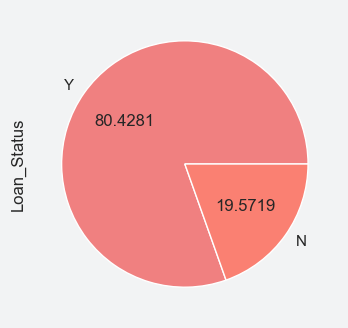

In [26]:
# Pie Plot For Loan Status(Target Variable)
raw_data["Loan_Status"].value_counts().plot(kind="pie",autopct="%.4f");

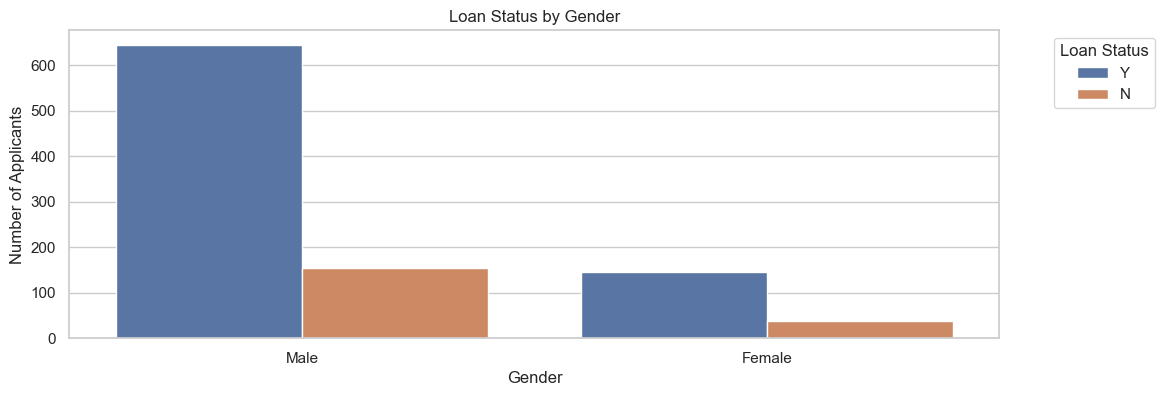

In [27]:
# Group by Gender and Loan_Status, and count the occurrences
loan_status_counts = raw_data.groupby(['Gender', 'Loan_Status']).size().unstack()

# Plotting with Seaborn
sns.set(style="whitegrid")
sns.countplot(x='Gender', hue='Loan_Status', data=raw_data)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

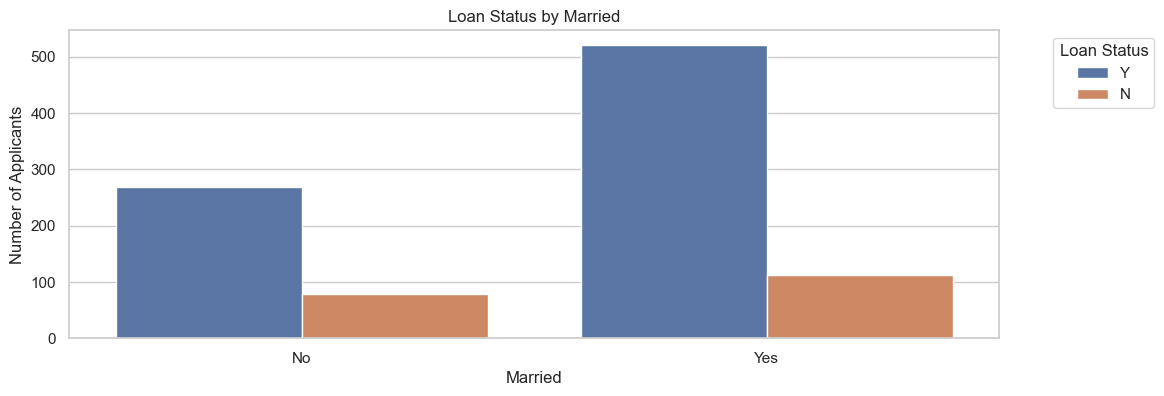

In [28]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Married', hue='Loan_Status', data=raw_data)

# Set legend labels
legend_labels = {'Y': 'Approved', 'N': 'Not Approved'}

# Show legend
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status by Married')
plt.xlabel('Married')
plt.ylabel('Number of Applicants')
plt.show()

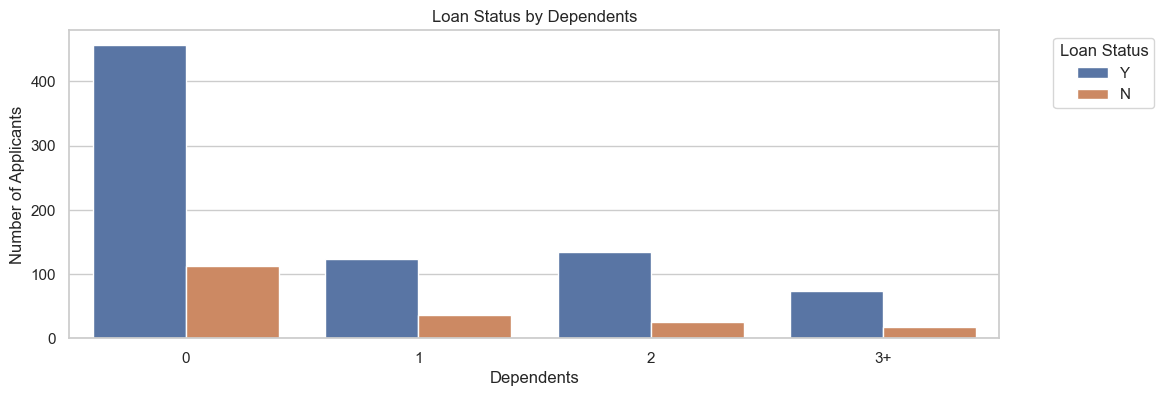

In [29]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Dependents', hue='Loan_Status', data=raw_data)

# Set legend labels
legend_labels = {'Y': 'Approved', 'N': 'Not Approved'}

# Show legend
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Applicants')
plt.show()

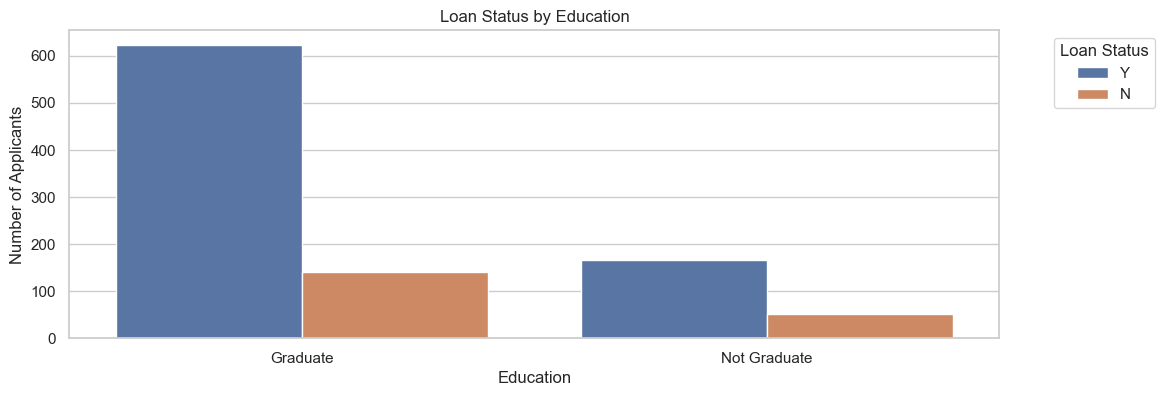

In [30]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Education', hue='Loan_Status', data=raw_data)

# Set legend labels
legend_labels = {'Y': 'Approved', 'N': 'Not Approved'}

# Show legend
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Number of Applicants')
plt.show()

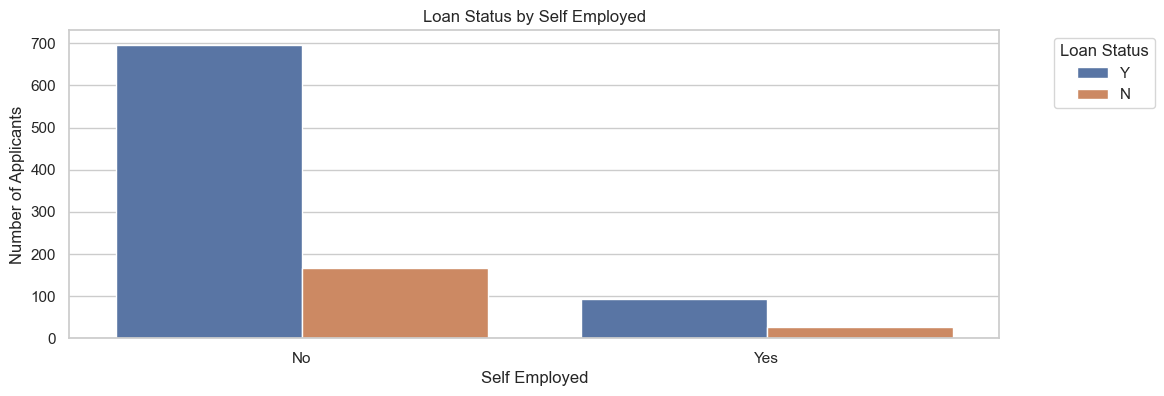

In [31]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Self_Employed', hue='Loan_Status', data=raw_data)

# Set legend labels
legend_labels = {'Y': 'Approved', 'N': 'Not Approved'}

# Show legend
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status by Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Number of Applicants')
plt.show()

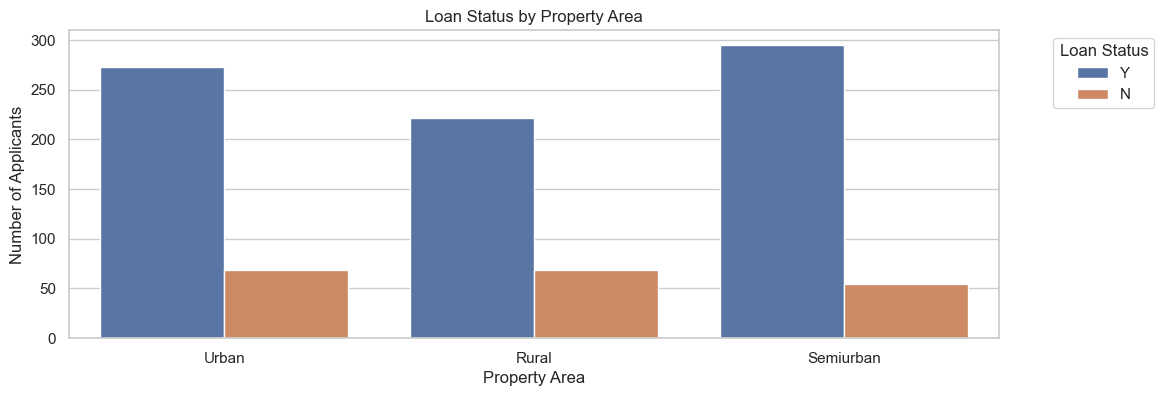

In [32]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Property_Area', hue='Loan_Status', data=raw_data)

# Set legend labels
legend_labels = {'Y': 'Approved', 'N': 'Not Approved'}

# Show legend
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Applicants')
plt.show()

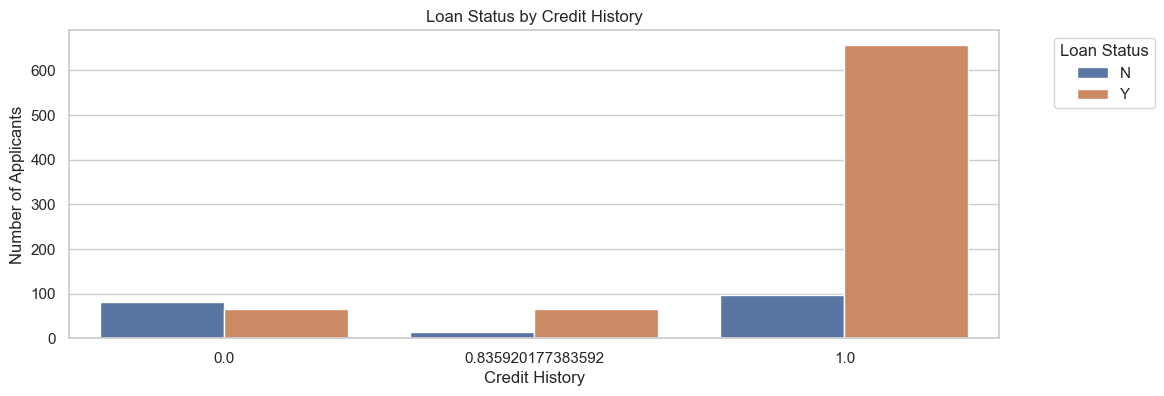

In [33]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Credit_History', hue='Loan_Status', data=raw_data)

# Set legend labels
legend_labels = {'Y': 'Approved', 'N': 'Not Approved'}

# Show legend
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.show()

In [34]:
# Manipulate the Dependent Variable 3+ to 3:
raw_data["Dependents"] = np.where(raw_data["Dependents"]=="3+",3, raw_data["Dependents"])

In [35]:
#Converting dependents into int because the date in Contineous Form
raw_data["Dependents"] = raw_data["Dependents"].astype(int)

In [36]:
# Mapping the object columns to convert it into (0 and 1) form and then change the data type to int
raw_data['Married']=raw_data['Married'].map({'Yes':1, 'No':0})
raw_data['Education']=raw_data['Education'].map({'Graduate':1, 'Not Graduate':0})
raw_data['Self_Employed']=raw_data['Self_Employed'].map({'Yes':1, 'No':0})
raw_data['Loan_Status']=raw_data['Loan_Status'].map({'Y':1, 'N':0})

In [37]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    int64  
dtypes: float64(4), int32(1), int64(5), object(3)
memory usage: 95.9+ KB


In [38]:
new_train_data = raw_data.loc[0:train_data.shape[0]-1, ]
new_test_data = raw_data.loc[train_data.shape[0]:, ]

In [39]:
new_train_data = new_train_data.drop('Loan_ID', axis=1)

In [40]:
#Using get dummies for the remaining object columns for which mapping or encoder cant be used 
new_train_data=pd.get_dummies(new_train_data)
new_train_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,142.51153,360.0,1.0,1,0,1,0,0,1
1,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,0,0,1,1,0,0
2,1,0,1,1,3000,0.0,66.00000,360.0,1.0,1,0,1,0,0,1
3,1,0,0,0,2583,2358.0,120.00000,360.0,1.0,1,0,1,0,0,1
4,0,0,1,0,6000,0.0,141.00000,360.0,1.0,1,0,1,0,0,1


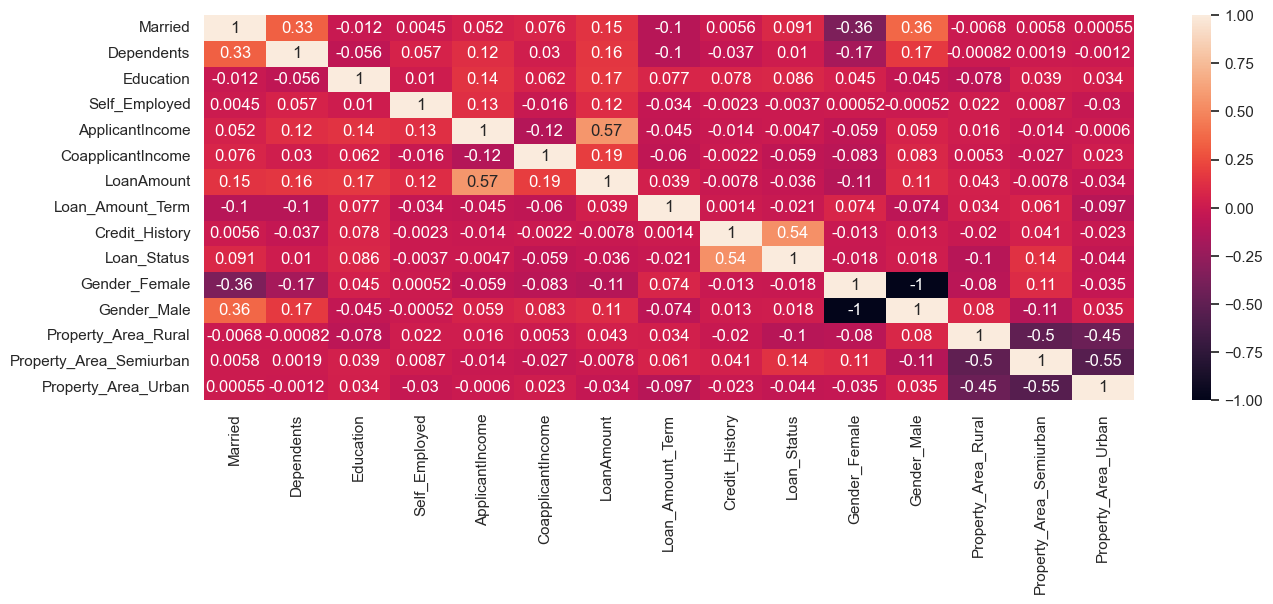

In [41]:
#Checking for correlation again now that we have treated the object columns
plt.figure(figsize=(15,5))
sns.heatmap(new_train_data.corr(),annot=True)
plt.show()

In [42]:
# Spliting the dataset into features and target
x_variables = new_train_data.drop('Loan_Status',axis=1)
y_variables = new_train_data["Loan_Status"]

In [43]:
### Split Data - train, test 
X_train, X_test, y_train, y_test = train_test_split(x_variables, y_variables, test_size=0.2, random_state = 10)

In [44]:
print("X_train Size :",len(X_train))
print("Y_train Size :",len(y_train))
print("X_test Size :",len(X_test))
print("Y_test Size :",len(y_test))
print("Train Size :", (len(X_train)/len(x_variables))*100)
print("Train Size :", (len(X_test)/len(x_variables))*100) 

X_train Size : 491
Y_train Size : 491
X_test Size : 123
Y_test Size : 123
Train Size : 79.96742671009773
Train Size : 20.03257328990228


## Logistic Regression Equation

Logistic Regression is a type of regression analysis used for predicting the probability of an outcome. It is particularly useful for binary classification problems. The logistic regression model is based on the logistic function, also known as the sigmoid function.

The logistic function is defined as:

$$ S(z) = \frac{1}{1 + e^{-z}} $$

Where:
- \( S(z) \) is the sigmoid function output (probability),
- \( e \) is the base of the natural logarithm,
- \( z \) is the linear combination of input features.

In the context of logistic regression, \( z \) is defined as:

$$ z = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n $$

Where:
- \( \beta_0 \) is the intercept term,
- \( \beta_1, \beta_2, \ldots, \beta_n \) are the coefficients associated with the input features \( x_1, x_2, \ldots, x_n \).

Putting it all together, the logistic regression model can be expressed as:

$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n)}} $$

Where:
- \( P(Y=1) \) is the probability of the outcome variable \( Y \) being 1.

This equation represents the probability that the dependent variable \( Y \) is 1 given the values of input features \(


In [45]:
# Using logistic regression supervised ML classification model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = logistic.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7967479674796748
[[12 24]
 [ 1 86]]
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



In [47]:
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
i=1
for train_index,test_index in kf.split(x_variables,y_variables):
    global model
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x_variables.iloc[train_index],x_variables.iloc[test_index]
    ytr,yvl=y_variables.iloc[train_index],y_variables.iloc[test_index]    
    model=LogisticRegression(random_state=1, max_iter=1000 )
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score: ', score)
    i+=1
    pred_test =model.predict(X_test)
    pred= model.predict_proba(xvl)[:,1]

1 of kfold 5
Accuracy score:  0.8048780487804879
2 of kfold 5
Accuracy score:  0.8373983739837398
3 of kfold 5
Accuracy score:  0.7967479674796748
4 of kfold 5
Accuracy score:  0.8048780487804879
5 of kfold 5
Accuracy score:  0.7868852459016393


In [48]:
print(roc_curve(y_test,y_pred))

(array([0.        , 0.66666667, 1.        ]), array([0.        , 0.98850575, 1.        ]), array([inf,  1.,  0.]))


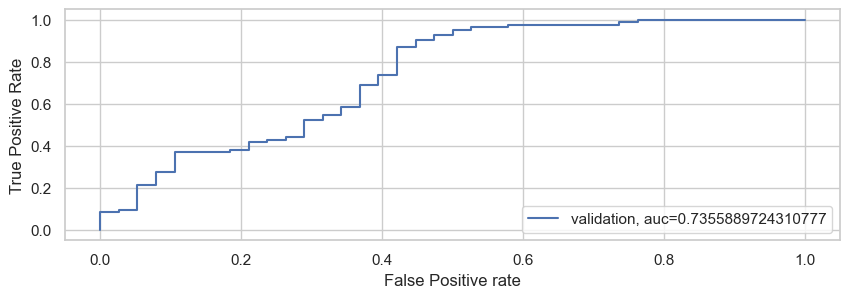

In [49]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)


fpr,tpr,_=metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,3))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')   
plt.legend(loc=4)
plt.show()

In [50]:
print(roc_auc_score(y_test,y_pred))


0.6609195402298851
